In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [9]:
%matplotlib inline

## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [20]:
ground_cricket_data = {"Chirps_Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground_Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
df

,Chirps_Second,Ground_Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


### Tasks

## 1. Find the linear regression equation for this data.

In [29]:
# Separate data first
cps = df.Chirps_Second.to_frame()
gtemp = df.Ground_Temperature.to_frame()

#Fit:put data in, predict:calculate
lregression = linear_model.LinearRegression()
lrfit = lregression.fit(gtemp,cps)

In [32]:
# Get slope and y-intercept
slope, yintercept = lrfit.coef_[0][0], lrfit.intercept_[0]
eqn = "{:.1f}x + {:.1f}".format(slope, yintercept)

'0.2x + 0.5'

## 2. Chart the original data and the equation on the chart.

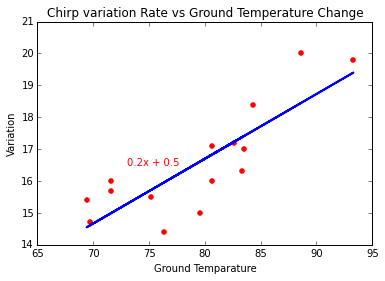

In [36]:
plt.scatter(gtemp, cps, color='red')
plt.plot(gtemp, lrfit.predict(gtemp), color='blue', linewidth=2)
plt.text(73, 16.5, eqn, color='red')
plt.title("Chirp variation Rate vs Ground Temperature Change")
plt.xlabel("Ground Temparature")
plt.ylabel("Variation")

## 3. Find the equation's $R^2$ score 
(use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [62]:
lrfit.score(gtemp, cps)

0.69229465291469983

The equation is not a good fit, though it approaches to since the $R^2$ is below the optimal

## 4. Extrapolate data:  
If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [63]:
lrfit.predict(95)[0][0]

19.744289128968745

## 5. Interpolate data:  
With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning?

In [41]:
def interpolation(value, y_intercept, slope):
    return ((value - y_intercept) / slope)
interpolation(18, yintercept, slope)

86.407431345485676

## Brain vs. Body Weight
In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.
### Tasks
####1. Find the linear regression equation for this data for brain weight to body weight.

In [51]:
# data
df = pd.read_fwf("brain_body.txt")
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 2 columns):
Brain    62 non-null float64
Body     62 non-null float64
dtypes: float64(2)
memory usage: 1.5 KB


In [53]:
brain = df.Brain.to_frame()
body = df.Body.to_frame()
#Fit the data we have
lr = linear_model.LinearRegression()
lrfitbrain = lr.fit(brain,body)

In [54]:
# Get slope and y-intercept
grad, y = lrfitbrain.coef_[0][0], lrfitbrain.intercept_[0]
equation = "{:.1f}x + {:.1f}".format(grad, y)
equation

'1.0x + 91.0'

####2. Chart the original data and the equation on the chart.


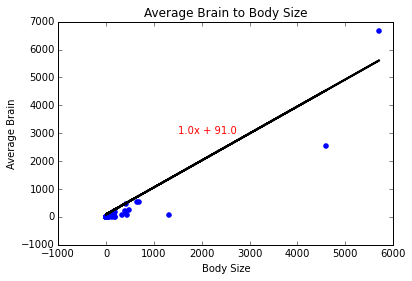

In [60]:
plt.scatter(body, brain, color='blue')
plt.plot(body, lrfitbrain.predict(body), color='black', linewidth=2)
plt.text(1500, 3000, equation, color='red')
plt.title("Average Brain to Body Size")
plt.xlabel("Body Size")
plt.ylabel("Average Brain")

####3. Find the equation's $R^2$ score 
(use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [61]:
lrfitbrain.score(body, brain)

0.8337496231210324

The equtation is a good fit as it is way above the optimal value of 0.8

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks
####1. Find the linear regression equation for this data using columns 1-5 to column 6.

In [64]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [70]:
input_data = df[['Sex','Rank','Year','Degree','YSdeg']]
salary = df['Salary']

regr = linear_model.LinearRegression()
salaryfit = regr.fit(input_data, salary)

In [74]:
gradient, yintcpt = regr.coef_

ValueError: too many values to unpack (expected 2)

####2. Find the selection of columns with the best $R^2$ score.

In [75]:
print("Combined Score is: {:.2f}".format(regr.score(input_data, salary)))

Combined Score is: 0.85


In [81]:
print("Individual Scores")
columns = ['Sex','Rank','Year','Degree','YSdeg']
for column in columns:
    reg = linear_model.LinearRegression()
    ft = reg.fit(df[[column]], salary)
    print("{} has score {:.2f}".format(column, reg.score(df[[column]], salary)))

Individual Scores
Sex has score 0.06
Rank has score 0.75
Year has score 0.49
Degree has score 0.00
YSdeg has score 0.46


####3. Report whether sex is a factor in salary.

From the Individual Scores Sex is not a factor